In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
gdata=pd.read_csv('Data Set/Admission_Predict.csv')
col_names=gdata.columns.tolist()
print("Column names:")
print(col_names)
print("\nSample Data:")
print(gdata.head())

Column names:
['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

Sample Data:
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [3]:
gdata=gdata.rename(columns={'Serial No.':'no','GRE Score':'gre','TOEFL Score':'toefl','University Rating':'rating','SOP':'sop','LOR ':'lor',
                           'CGPA':'gpa','Research':'research','Chance of Admit ':'chance'})

In [4]:
gdata.dtypes

no            int64
gre           int64
toefl         int64
rating        int64
sop         float64
lor         float64
gpa         float64
research      int64
chance      float64
dtype: object

In [5]:
print('Shape of the data:')
gdata.shape

Shape of the data:


(400, 9)

In [6]:
print('Missing values in columns:')
gdata.isnull().any()

Missing values in columns:


no          False
gre         False
toefl       False
rating      False
sop         False
lor         False
gpa         False
research    False
chance      False
dtype: bool

In [7]:
gdata.describe()

,no,gre,toefl,rating,sop,lor,gpa,research,chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
gdata.groupby('rating').mean()

,no,gre,toefl,sop,lor,gpa,research,chance
rating,,,,,,,,
1,233.807692,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,214.813084,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,204.165414,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,199.594595,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,153.533333,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


In [9]:
gdata[gdata['chance']>0.82].groupby('chance').mean()

,no,gre,toefl,rating,sop,lor,gpa,research
chance,,,,,,,,
0.83,251.000000,326.000000,112.666667,3.666667,3.833333,4.166667,9.120000,0.666667
0.84,207.111111,324.000000,109.444444,3.444444,3.777778,3.555556,9.038889,1.000000
0.85,229.000000,322.000000,111.500000,3.666667,4.083333,4.166667,9.041667,0.833333
0.86,195.750000,325.500000,114.750000,4.250000,4.312500,4.437500,9.107500,0.875000
0.87,155.800000,326.400000,111.400000,4.400000,4.400000,4.200000,9.072000,0.800000
0.88,127.000000,323.000000,110.750000,5.000000,4.875000,4.500000,9.152500,1.000000
0.89,227.444444,329.111111,113.666667,4.444444,4.333333,4.166667,9.263333,0.888889
0.90,151.000000,331.000000,116.125000,4.000000,4.562500,4.062500,9.305000,1.000000
0.91,199.857143,331.714286,114.857143,4.428571,4.285714,4.428571,9.358571,1.000000


**HISTOGRAM**

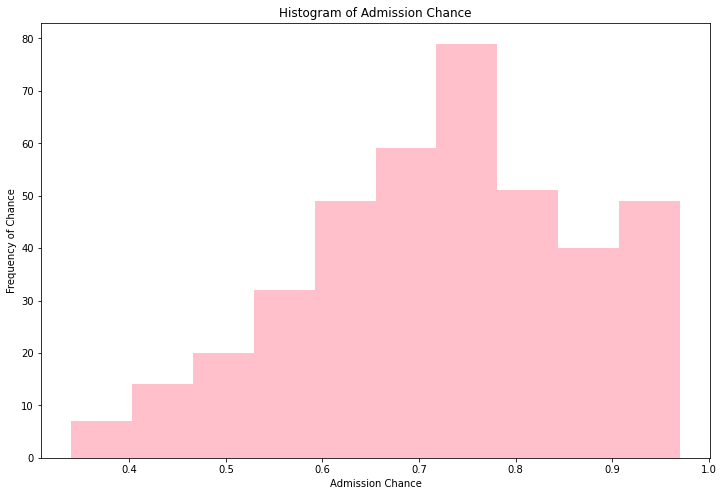

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.hist(gdata['chance'],bins=10,color="pink")
plt.title('Histogram of Admission Chance')
plt.xlabel('Admission Chance')
plt.ylabel('Frequency of Chance')
plt.show()

**LINE PLOT**

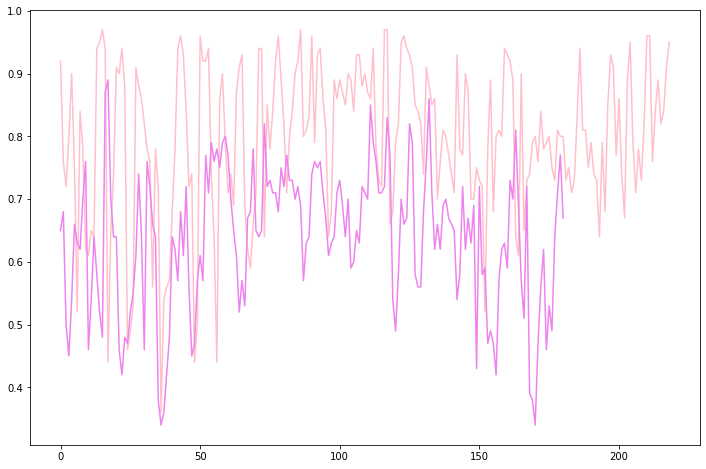

In [11]:
plt.figure(figsize=(12,8))
plt.plot(range(len(gdata[gdata['research']==1])), gdata[gdata['research']==1]['chance'], color='pink')
plt.plot(range(len(gdata[gdata['research']==0])), gdata[gdata['research']==0]['chance'], color='violet')
plt.show()

**SCATTER PLOT**

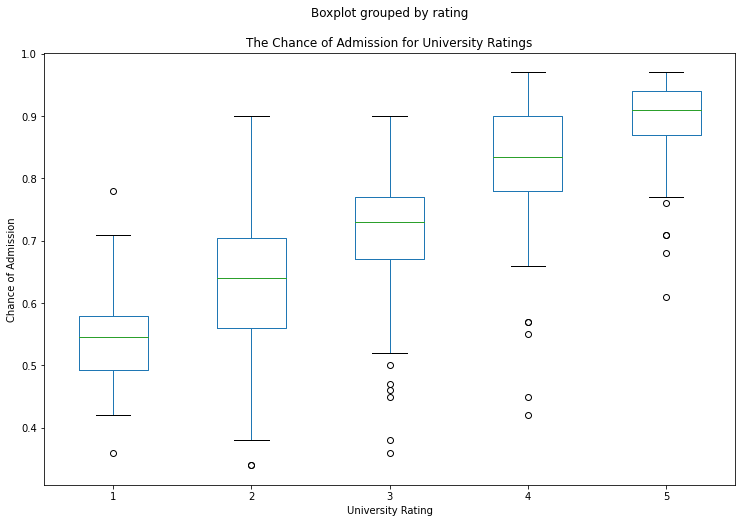

In [12]:
gdata.boxplot(column='chance',by='rating',grid=False,figsize=(12,8))
plt.title('The Chance of Admission for University Ratings')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')
plt.show()

**Histogram of Numeric Variables**

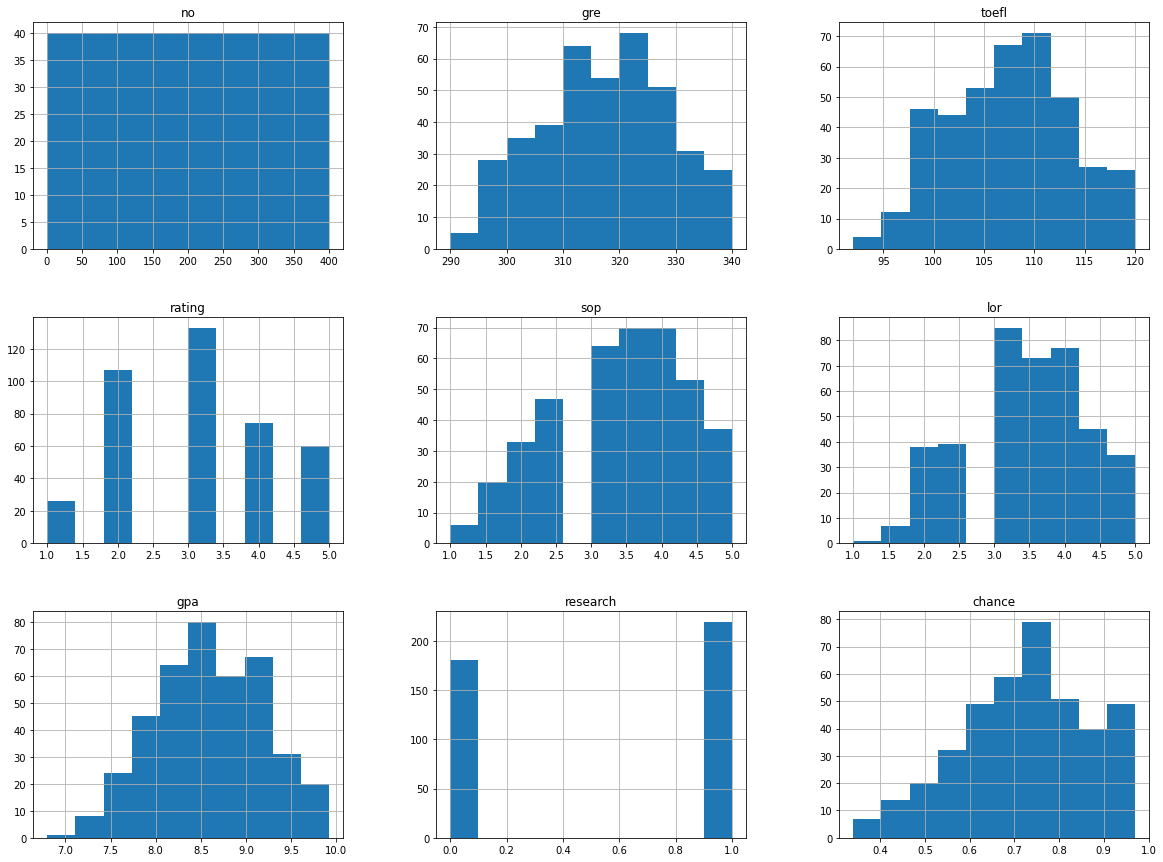

In [13]:
gdata.hist(bins=10, figsize=(20,15))
plt.show()

In [14]:
gdata.drop(['no'],axis=1,inplace=True)
var=gdata.columns.values.tolist()
y=gdata['chance']
x=[i for i in var if i not in ['chance']]
x=gdata[x]

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [16]:
from sklearn.preprocessing import MinMaxScaler
xs=MinMaxScaler()
x_train[x_train.columns] = xs.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = xs.transform(x_test[x_test.columns])

**CLASSIFATION MODELS**

In [17]:
import numpy as np
cy_train=[1 if chance > 0.82 else 0 for chance in y_train]
cy_train=np.array(cy_train)

cy_test=[1 if chance > 0.82 else 0 for chance in y_test]
cy_test=np.array(cy_test)

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, cy_train)

LogisticRegression()

In [19]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(cy_test, lr.predict(x_test))))
print('--------------------------------------')
from sklearn.metrics import classification_report
print(classification_report(cy_test, lr.predict(x_test)))

Logistic regression accuracy: 0.925
--------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        61
           1       0.93      0.74      0.82        19

    accuracy                           0.93        80
   macro avg       0.93      0.86      0.89        80
weighted avg       0.93      0.93      0.92        80



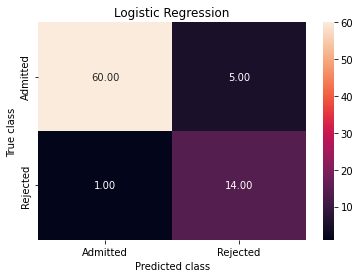

In [20]:
cy = lr.predict(x_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
lr_confm = confusion_matrix(cy, cy_test,)
sns.heatmap(lr_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, cy_train)


RandomForestClassifier()

In [22]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(cy_test, rf.predict(x_test))))
print('--------------------------------------')
print(classification_report(cy_test, rf.predict(x_test)))


Random Forest Accuracy: 0.963
--------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        61
           1       0.94      0.89      0.92        19

    accuracy                           0.96        80
   macro avg       0.96      0.94      0.95        80
weighted avg       0.96      0.96      0.96        80



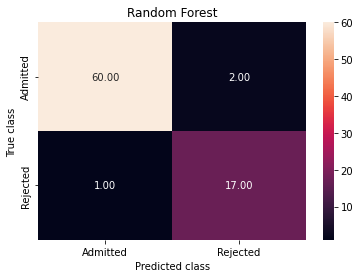

In [23]:
cy = rf.predict(x_test)
rf_confm = confusion_matrix(cy, cy_test,)
sns.heatmap(rf_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.show()

In [24]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, cy_train)

SVC()

In [25]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(cy_test, svc.predict(x_test))))
print('--------------------------------------')
print(classification_report(cy_test, svc.predict(x_test)))

Support vector machine accuracy: 0.912
--------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        61
           1       0.93      0.68      0.79        19

    accuracy                           0.91        80
   macro avg       0.92      0.83      0.87        80
weighted avg       0.91      0.91      0.91        80



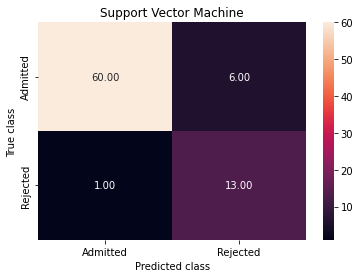

In [26]:
cy = svc.predict(x_test)
svc_confm = confusion_matrix(cy, cy_test,)
sns.heatmap(svc_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.show()

In [27]:
f_imp=pd.Series(rf.feature_importances_,index=x_train.columns).sort_values(ascending=False)
print(f_imp)

gpa         0.371314
gre         0.186279
toefl       0.153930
rating      0.130980
lor         0.074033
sop         0.069934
research    0.013530
dtype: float64
